In [1]:
import torch
import segmentation_models_pytorch as smp
from torch import nn
from src.conf.config import CONFIG
from src.dl.inferer import Inferer
from src.dl.lightning_model import SegModel
from src.dl.model_builder import SmpModelWithClsBranch, SmpGeneralModel

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [2]:
config = CONFIG
inst_model = smp.PSPNet(
    encoder_name="resnext50_32x4d", 
    classes=2,
    # decoder_merge_policy='cat'
)

type_model = smp.PSPNet(
    encoder_name="resnext50_32x4d", 
    classes=5,
    # decoder_merge_policy='cat'
)

base_model = SmpModelWithClsBranch(inst_model, type_model)
lightning_model = SegModel.from_conf(base_model, config)

ckpt = lightning_model.fm.model_checkpoint(config.inference_args.model_weights)
checkpoint = torch.load(ckpt, map_location = lambda storage, loc : storage)
lightning_model.load_state_dict(checkpoint['state_dict'], strict=False)

<All keys matched successfully>

In [3]:
inf = Inferer.from_conf(lightning_model, config)

In [4]:
inf.run_predictions_all()

Prediction for: test_1
/home/leos/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function extract_patches is deprecated; The function feature_extraction.image.extract_patches has been deprecated in 0.22 and will be removed in 0.24.

Prediction for: test_10
Prediction for: test_11
Prediction for: test_12
Prediction for: test_13
Prediction for: test_14
Prediction for: test_2
Prediction for: test_3
Prediction for: test_4
Prediction for: test_5
Prediction for: test_6
Prediction for: test_7
Prediction for: test_8
Prediction for: test_9


In [5]:
inf.post_process()

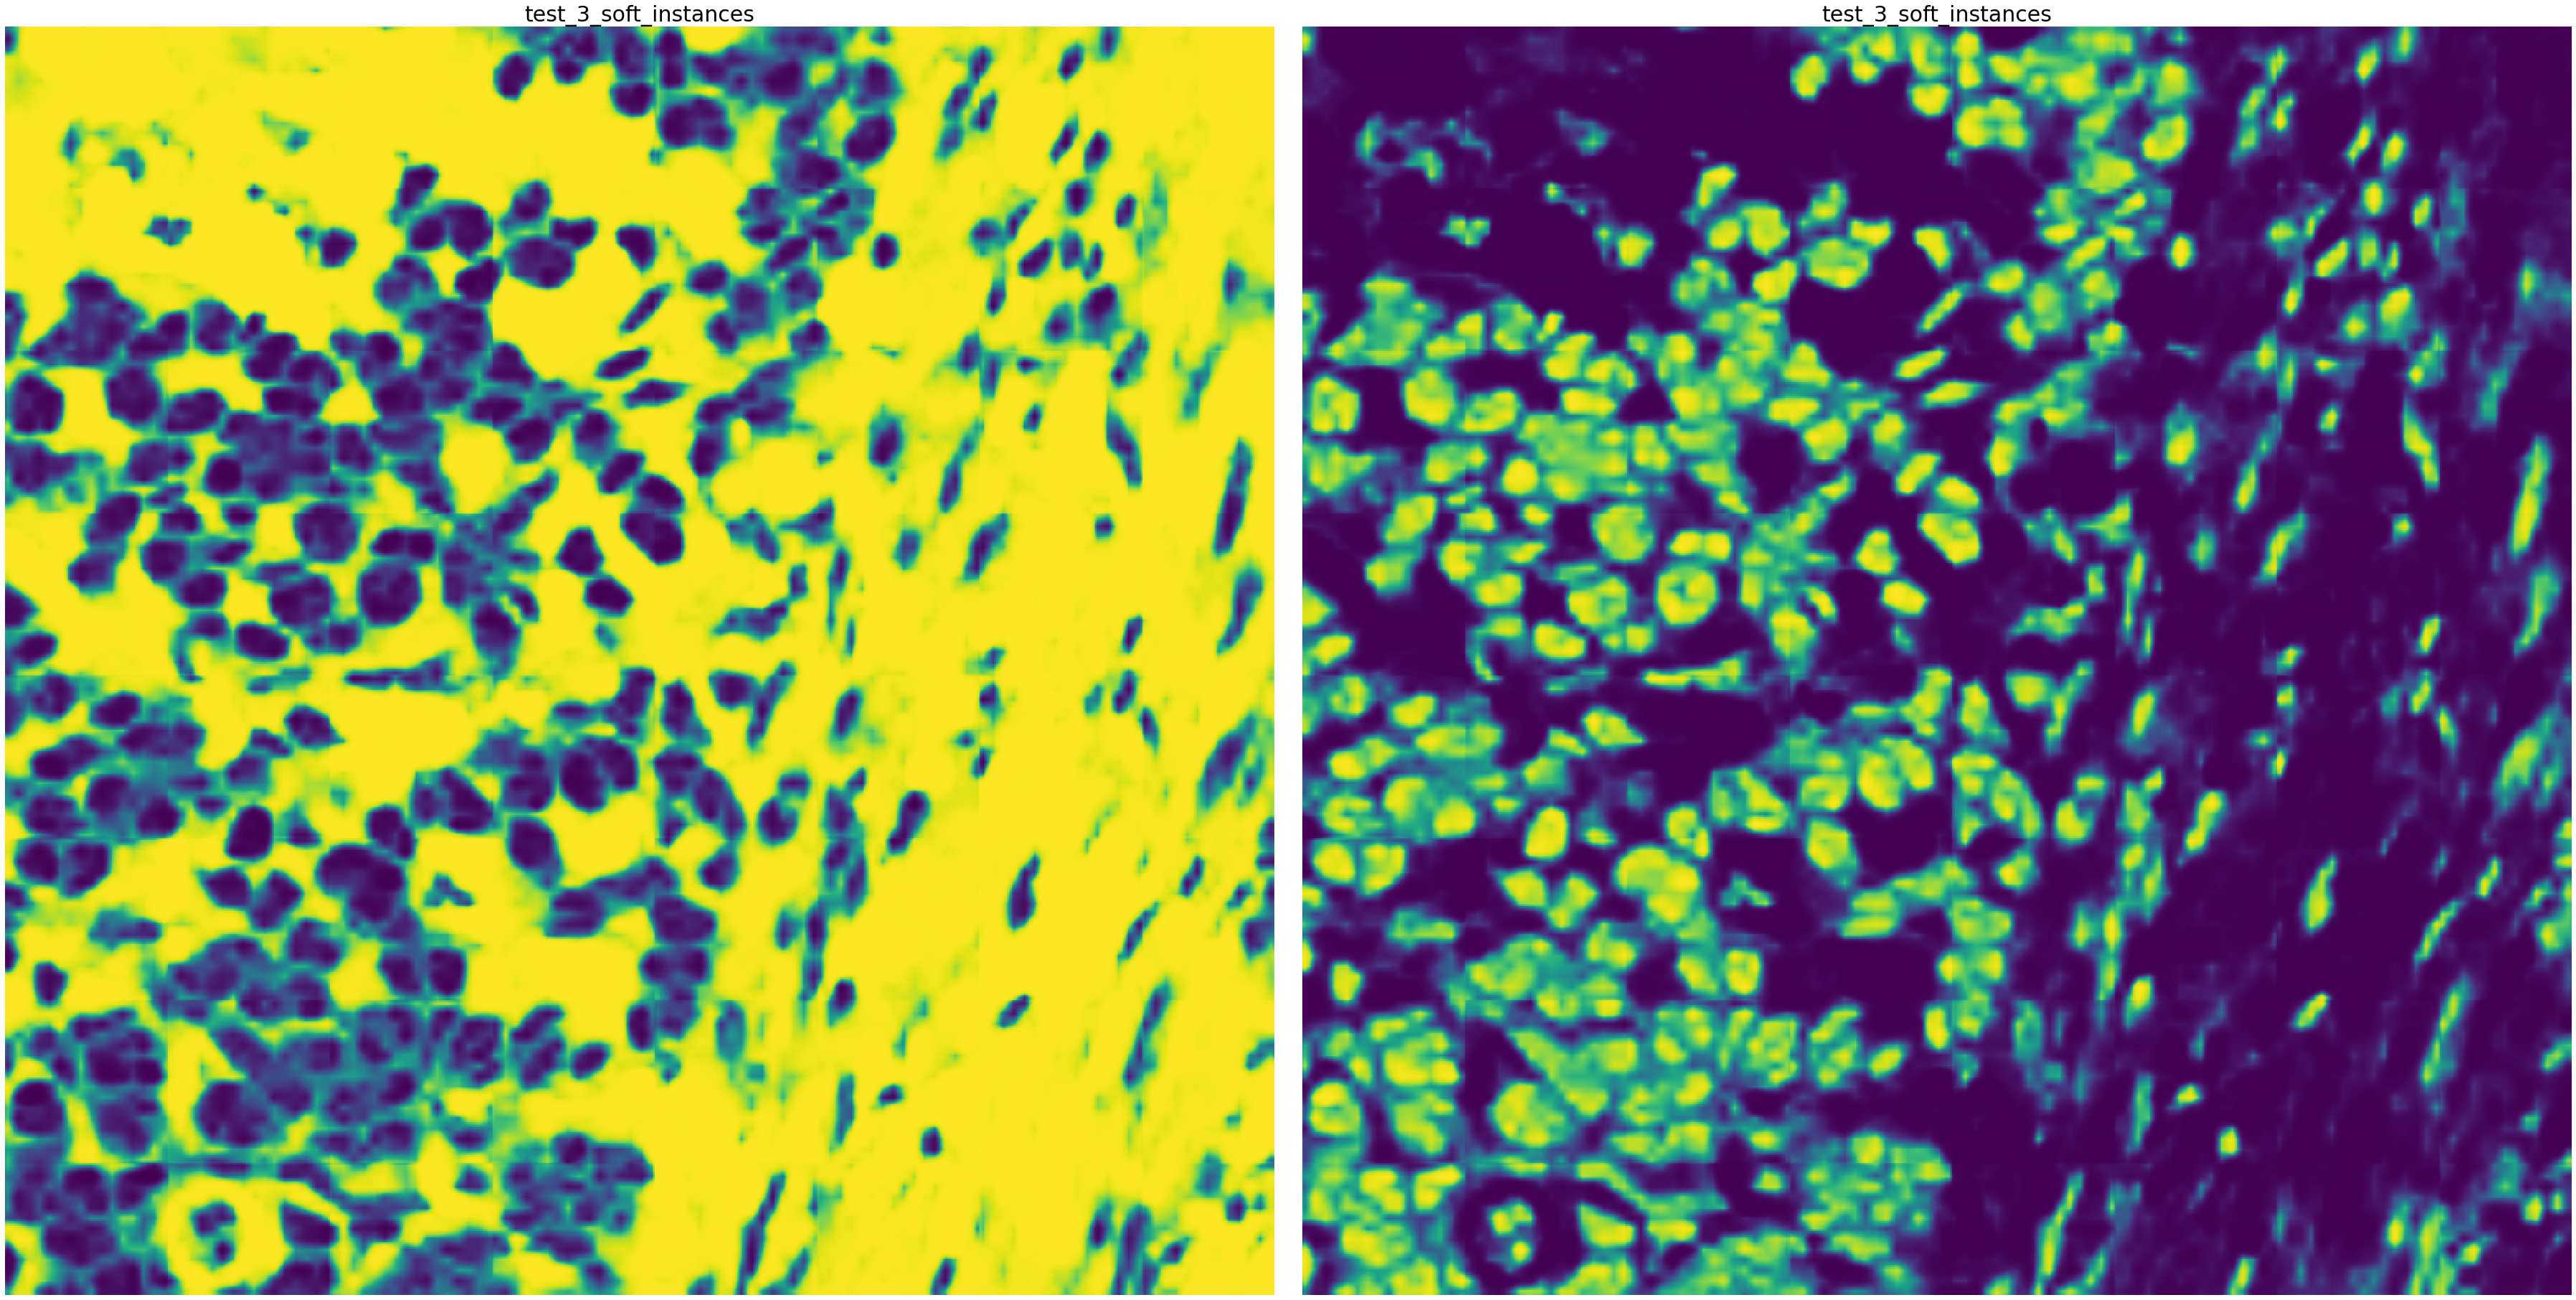

In [10]:
inf.plot_outputs("soft_insts", ixs = [8], contour=True, gt_mask=True)

In [10]:
score_dfs = inf.run_benchmarks(save=True)

In [11]:
score_dfs["instance_metrics"]

AJI  AJI_plus     DICE2        PQ        SQ  \
test_1_metrics        0.329812  0.417026  0.433914  0.381475  0.650672   
test_10_metrics       0.366025  0.420020  0.467068  0.421123  0.650252   
test_11_metrics       0.291303  0.391657  0.401713  0.269019  0.622972   
test_12_metrics       0.464380  0.514051  0.573800  0.461737  0.653585   
test_13_metrics       0.413668  0.471499  0.571809  0.430212  0.651636   
test_14_metrics       0.428222  0.457455  0.573363  0.433342  0.663421   
test_2_metrics        0.456312  0.467625  0.617563  0.387450  0.642925   
test_3_metrics        0.429471  0.486785  0.498857  0.418300  0.660291   
test_4_metrics        0.462349  0.494066  0.500101  0.394457  0.662465   
test_5_metrics        0.333558  0.435838  0.457499  0.424592  0.664524   
test_6_metrics        0.499384  0.541813  0.646379  0.464649  0.696974   
test_7_metrics        0.380187  0.431669  0.556708  0.342499  0.624652   
test_8_metrics        0.225930  0.328270  0.299539  0.292936  0.632930   
test_9_metrics        0.439715  0.470117  0.609090  0.446239  0.664009   
averages_for_the_set  0.394308  0.451992  0.514815  0.397716  0.652951   

                            DQ  inst_Sensitivity  inst_Precision    splits  \
test_1_metrics        0.586279          0.489017        0.731834  0.592134   
test_10_metrics       0.647631          0.590533        0.716954  0.855236   
test_11_metrics       0.431832          0.324977        0.643382  0.727393   
test_12_metrics       0.706468          0.663551        0.755319  0.488551   
test_13_metrics       0.660203          0.551141        0.823077  0.685066   
test_14_metrics       0.653193          0.726619        0.593245  1.366824   
test_2_metrics        0.602637          0.653061        0.559441  0.498473   
test_3_metrics        0.633508          0.614213        0.654054  0.586383   
test_4_metrics        0.595438          0.593301        0.597590  0.765395   
test_5_metrics        0.638941          0.557143        0.748892  0.870921   
test_6_metrics        0.666667          0.613333        0.730159  0.421924   
test_7_metrics        0.548303          0.435685        0.739437  0.187516   
test_8_metrics        0.462825          0.397764        0.553333  0.749853   
test_9_metrics        0.672037          0.569201        0.820225  0.332972   
averages_for_the_set  0.607569          0.555681        0.690496  0.652046   

                        merges  
test_1_metrics        1.148340  
test_10_metrics       0.984618  
test_11_metrics       1.298240  
test_12_metrics       0.593638  
test_13_metrics       1.361968  
test_14_metrics       0.797330  
test_2_metrics        0.522238  
test_3_metrics        0.947235  
test_4_metrics        1.020647  
test_5_metrics        1.334284  
test_6_metrics        0.334062  
test_7_metrics        0.241942  
test_8_metrics        1.374968  
test_9_metrics        0.618421  
averages_for_the_set  0.898424

In [13]:
df = score_dfs["type_metrics"].rename_axis("fn").reset_index()
df[df.fn.str.contains("avg")]

fn       AJI  AJI_plus     DICE2         PQ  \
14   miscellanous_avg_for_the_set  0.112113   0.11617  0.377332  0.0909286   
43   inflammatory_avg_for_the_set  0.259178  0.263674   0.57018   0.276492   
86     epithelial_avg_for_the_set  0.253849  0.264252  0.548176   0.273414   
143       spindle_avg_for_the_set  0.193615  0.201315  0.536751   0.209087   

           SQ        DQ inst_Sensitivity inst_Precision     splits     merges  
14   0.359584  0.141768          0.10864       0.294483   0.024833  0.0705767  
43    0.54512  0.388699         0.370659       0.499514  0.0764572  0.0973807  
86    0.55347  0.385934         0.364175       0.497715   0.118337   0.123575  
143  0.562298  0.295276         0.307733       0.393206   0.228601   0.552199